In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import geopy.distance
files = ["201909-citibike-tripdata.csv"]
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs)

In [7]:
df = df.drop(df.index[(df['tripduration'] > 7200)])
df = df[(df['birth year'] < 2000) & (df['birth year'] > 1970)]

In [8]:
def calculateDistances(df):
    df['start station coordinates'] = list(zip(df['start station latitude'], df['start station longitude']))
    df['end station coordinates'] = list(zip(df['end station latitude'], df['end station longitude']))
    df['distance'] = (np.vectorize(lambda x,y : geopy.distance.geodesic(x, y).km)
                      (df['start station coordinates'], df['end station coordinates']))

In [15]:
def groupByStartHour(df, ind):
    return df.starttime.loc[ind][11:13]

In [10]:
%time calculateDistances(df)

CPU times: user 4min 32s, sys: 188 ms, total: 4min 32s
Wall time: 4min 32s


In [12]:
df['speed'] = df['distance'] / df['tripduration'] * 3600

In [17]:
groupedbystarthour = df.groupby(lambda x: groupByStartHour(df, x))

In [18]:
meanpacesbyhour = groupedbystarthour.mean()['speed']

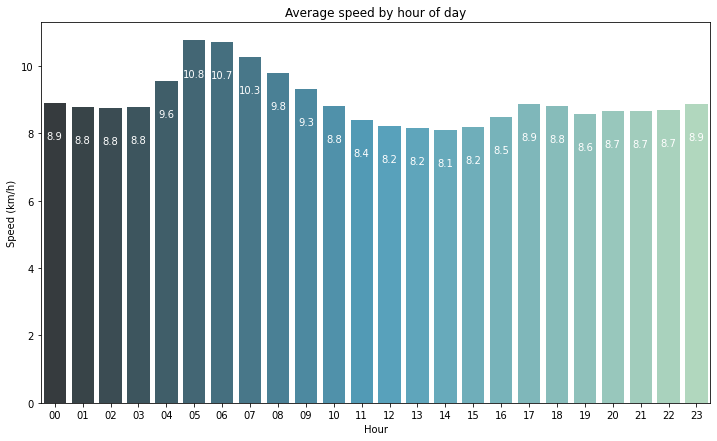

In [55]:
ax = sns.barplot(meanpacesbyhour.index, meanpacesbyhour, palette="GnBu_d")
ax.set_title('Average speed by hour of day', fontsize = 12)
ax.set(xlabel='Hour', ylabel='Speed (km/h)')
rcParams['figure.figsize'] = 12,7
padding = 0.1 * meanpacesbyhour.max()
for index, pace in enumerate(meanpacesbyhour):
    ax.text(index,pace - padding, round(pace, 1), 
            color='white', ha="center", fontsize = 10)
plt.show()

In [58]:
countoftripsbyhour = groupedbystarthour.count()['tripduration']

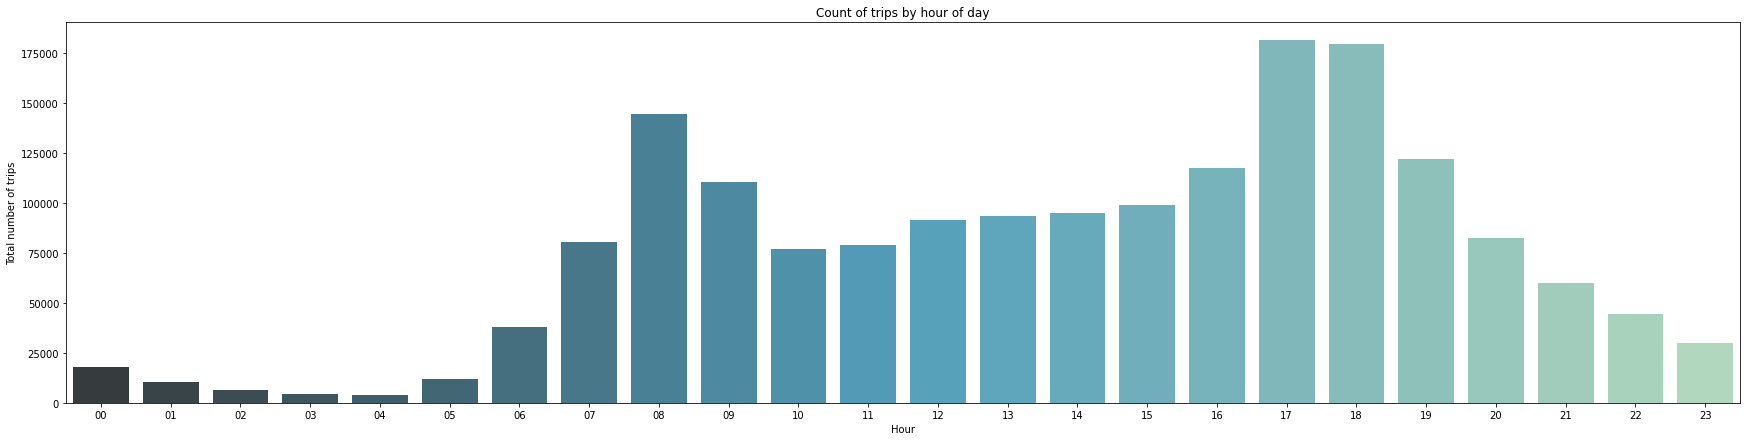

In [68]:
ax = sns.barplot(countoftripsbyhour.index, countoftripsbyhour, palette="GnBu_d")
ax.set_title('Count of trips by hour of day', fontsize = 12)
ax.set(xlabel='Hour', ylabel='Total number of trips')
rcParams['figure.figsize'] = 12,7
plt.show()

In [39]:
import datetime

In [45]:
datetime.datetime.strptime("2019-09-01 00:00:08.0640", "%Y-%m-%d %H:%M:%S.%f").strftime("%A")

'Sunday'

In [46]:
def groupByWeekDay(df, ind):
    return datetime.datetime.strptime(df.starttime.loc[ind], "%Y-%m-%d %H:%M:%S.%f").strftime("%A")

In [48]:
groupedbyweekday = df.groupby(lambda x: groupByWeekDay(df, x))

In [49]:
meanpacebyweekday = groupedbyweekday.mean()['speed']

In [56]:
meanpacebyweekday = meanpacebyweekday.reindex(['Monday', 
                                               'Tuesday', 
                                               'Wednesday', 
                                               'Thursday', 
                                               'Friday', 
                                               'Saturday', 
                                               'Sunday'])

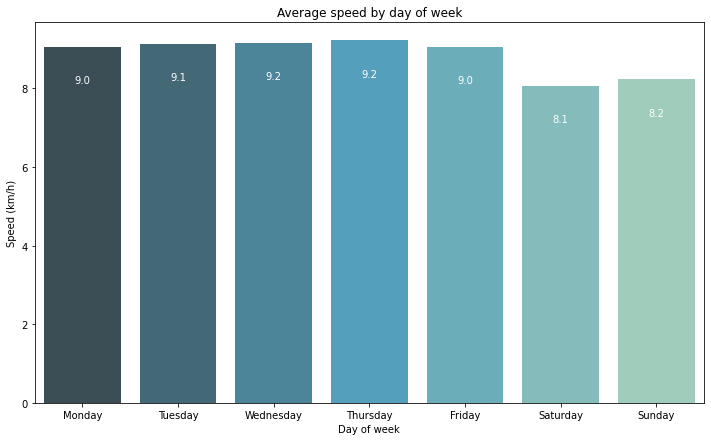

In [57]:
ax = sns.barplot(meanpacebyweekday.index, meanpacebyweekday, palette="GnBu_d")
ax.set_title('Average speed by day of week', fontsize = 12)
ax.set(xlabel='Day of week', ylabel='Speed (km/h)')
rcParams['figure.figsize'] = 12,7
padding = 0.1 * meanpacebyweekday.max()
for index, pace in enumerate(meanpacebyweekday):
    ax.text(index,pace - padding, round(pace, 1), 
            color='white', ha="center", fontsize = 10)
plt.show()

In [69]:
countoftripsbyweekday = groupedbyweekday.count()['tripduration']

In [71]:
countoftripsbyweekday = countoftripsbyweekday.reindex(['Monday', 
                                               'Tuesday', 
                                               'Wednesday', 
                                               'Thursday', 
                                               'Friday', 
                                               'Saturday', 
                                               'Sunday'])

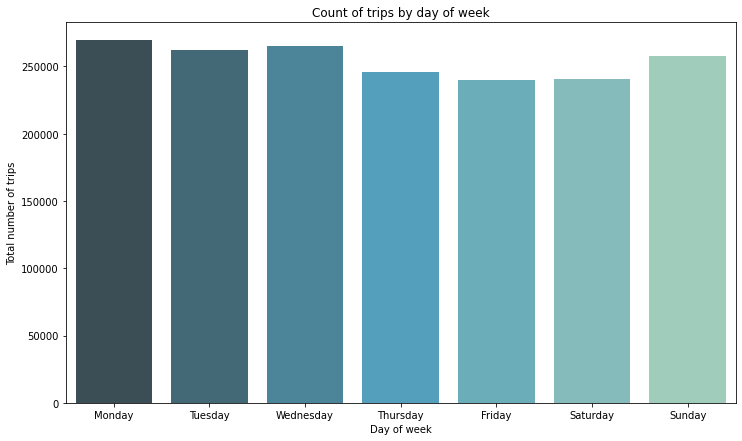

In [72]:
ax = sns.barplot(countoftripsbyweekday.index, countoftripsbyweekday, palette="GnBu_d")
ax.set_title('Count of trips by day of week', fontsize = 12)
ax.set(xlabel='Day of week', ylabel='Total number of trips')
rcParams['figure.figsize'] = 12,7
plt.show()